# Test LP Filter

Setup

In [4]:
import numpy as np
try:
    from SecondOrderElec import LP
    from SecondOrderElec.plot import plot_time
except ImportError:
    import sys
    sys.path.append('../.')
    from SecondOrderElec import LP
    from SecondOrderElec.plot import plot_time

Let's create some filters

In [6]:
T1 = LP(2,0.01,10)
T2 = LP(2,1.5,100)

Let's create a logspace for later

In [8]:
w = np.logspace(0,3,1000)

## Poles / Zeros

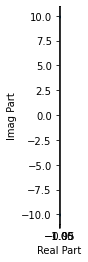

In [19]:
poles, zeros = T1.pzmap()

### Time Response

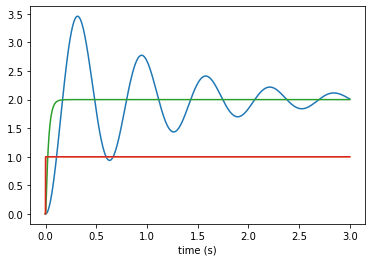

In [12]:
t = np.arange(0,3,0.001)
for T in [T1,T2]:
    T.step(T=t)

In [14]:
for index, T in enumerate([T1,T2]):
    print("system {}".format(index))
    print("wp = {} rad/s".format(T.wp))
    print("Tp = {} rad/s".format(T.Tp))
    print("R = {}".format(T.R))

system 0
wp = 9.9498743710662 rad/s
Tp = 0.6314838833996552 rad/s
R = 1.8803988026214895
system 1
wp = None rad/s
Tp = None rad/s
R = 0


### Frequency Response

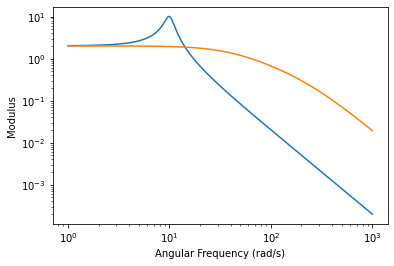

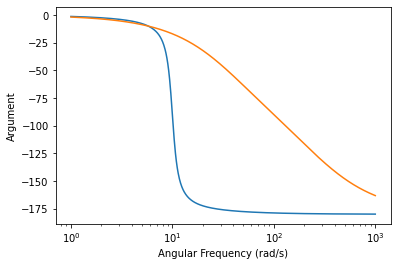

In [16]:
for T in [T1,T2]:
    T.freqresp(w=w)

### Output

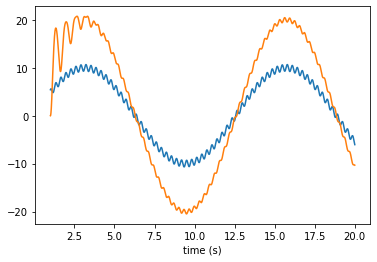

In [20]:
x = np.linspace(1, 20, 100000)
y = np.sin(x*0.5)*10+np.sin(x*20)*0.7
plot_time(x,y)
t,s,x = T1.output(U=y, T=x)
